In [63]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics


# import dataset
df_test = pd.read_csv(r"C:\Users\BernadettKepenyes\Documents\GitHub\employee-burnout\test.csv")
df_train = pd.read_csv(r"C:\Users\BernadettKepenyes\Documents\GitHub\employee-burnout\train.csv")

df_test.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe31003300390039003000      2008-12-10  Female      Service   
1  fffe31003300310037003800      2008-08-14  Female      Product   
2  fffe33003400380035003900      2008-11-13    Male      Product   
3      fffe3100370039003200      2008-02-07  Female      Service   
4  fffe32003600390036003700      2008-07-17  Female      Product   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  
0                  No          2.0                  5.0                   7.7  
1                 Yes          1.0                  2.0                   5.2  
2                 Yes          1.0                  3.0                   5.9  
3                  No          3.0                  6.0                   4.6  
4                  No          2.0                  5.0                   6.4

In [64]:
# learning about dataset
print('Test shape: ', df_test.shape, '\nTrain shape: ', df_train.shape)
print('\nDataset description: \n', df_train.describe())
print('\nUnique values: \n', df_train.nunique())

Test shape:  (12250, 8) 
Train shape:  (22750, 9)

Dataset description: 
         Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

Unique values: 
 Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Menta

In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [66]:
# missing values
# empty cells of train data
df_train.isnull().sum()/df_train.shape[0]

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     0.060703
Mental Fatigue Score    0.093055
Burn Rate               0.049407
dtype: float64

In [67]:
# empty cells of test data
df_test.isnull().sum()/df_test.shape[0]

Employee ID             0.0
Date of Joining         0.0
Gender                  0.0
Company Type            0.0
WFH Setup Available     0.0
Designation             0.0
Resource Allocation     0.0
Mental Fatigue Score    0.0
dtype: float64

In [68]:
# drop the rows with missing burn rate
df_train.dropna(subset=["Burn Rate"], inplace = True)
df_train.shape

(21626, 9)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Date of Joining       21626 non-null  object 
 2   Gender                21626 non-null  object 
 3   Company Type          21626 non-null  object 
 4   WFH Setup Available   21626 non-null  object 
 5   Designation           21626 non-null  float64
 6   Resource Allocation   20348 non-null  float64
 7   Mental Fatigue Score  19681 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [70]:
# encoding "Date of Joining"
current_date = pd.to_datetime('today')

df_train['Date of Joining'] = pd.to_datetime(df_train['Date of Joining'])
df_test['Date of Joining'] = pd.to_datetime(df_test['Date of Joining'])

def create_days_count(data):
    return(current_date - data['Date of Joining'])

df_train['days_count'] = df_train.apply(create_days_count, axis=1)
df_train['days_count'] = df_train['days_count'].dt.days

df_test['days_count'] = df_test.apply(create_days_count, axis=1)
df_test['days_count'] = df_test['days_count'].dt.days

df_train.head()
df_test.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe31003300390039003000      2008-12-10  Female      Service   
1  fffe31003300310037003800      2008-08-14  Female      Product   
2  fffe33003400380035003900      2008-11-13    Male      Product   
3      fffe3100370039003200      2008-02-07  Female      Service   
4  fffe32003600390036003700      2008-07-17  Female      Product   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  5.0                   7.7   
1                 Yes          1.0                  2.0                   5.2   
2                 Yes          1.0                  3.0                   5.9   
3                  No          3.0                  6.0                   4.6   
4                  No          2.0                  5.0                   6.4   

   days_count  
0        4409  
1        4527  
2        4436  
3        4716  
4        4555

In [71]:
# identifing columns with categorical data
df_train.select_dtypes(include=['object'])

Employee ID  Gender Company Type WFH Setup Available
0      fffe32003000360033003200  Female      Service                  No
1          fffe3700360033003500    Male      Service                 Yes
2      fffe31003300320037003900  Female      Product                 Yes
3      fffe32003400380032003900    Male      Service                 Yes
4      fffe31003900340031003600  Female      Service                  No
...                         ...     ...          ...                 ...
22745  fffe31003500370039003100  Female      Service                  No
22746  fffe33003000350031003800  Female      Product                 Yes
22747          fffe390032003000    Male      Service                 Yes
22748  fffe33003300320036003900  Female      Service                  No
22749      fffe3400350031003800    Male      Product                  No

[21626 rows x 4 columns]

In [72]:
# encoding caterogical variables
df_train['Gender'] = df_train['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df_train['Company Type'] = df_train['Company Type'].apply(lambda x: 0 if x=='Service' else 1)
df_train['WFH Setup Available'] = df_train['WFH Setup Available'].apply(lambda x: 0 if x=='No' else 1)

df_test['Gender'] = df_test['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df_test['Company Type'] = df_test['Company Type'].apply(lambda x: 0 if x=='Service' else 1)
df_test['WFH Setup Available'] = df_test['WFH Setup Available'].apply(lambda x: 0 if x=='No' else 1)

df_train.head()
df_test.head()

Employee ID Date of Joining  Gender  Company Type  \
0  fffe31003300390039003000      2008-12-10       1             0   
1  fffe31003300310037003800      2008-08-14       1             1   
2  fffe33003400380035003900      2008-11-13       0             1   
3      fffe3100370039003200      2008-02-07       1             0   
4  fffe32003600390036003700      2008-07-17       1             1   

   WFH Setup Available  Designation  Resource Allocation  \
0                    0          2.0                  5.0   
1                    1          1.0                  2.0   
2                    1          1.0                  3.0   
3                    0          3.0                  6.0   
4                    0          2.0                  5.0   

   Mental Fatigue Score  days_count  
0                   7.7        4409  
1                   5.2        4527  
2                   5.9        4436  
3                   4.6        4716  
4                   6.4        4555

In [73]:
# drop "Employee ID" and "Date of Joining" columns
df_train.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)
df_test.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)

df_train.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       0             0                    1          1.0   
2       1             1                    1          2.0   
3       0             0                    1          1.0   
4       1             0                    0          3.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  days_count  
0                  3.0                   3.8       0.16        4480  
1                  2.0                   5.0       0.36        4419  
2                  NaN                   5.8       0.49        4684  
3                  1.0                   2.6       0.20        4446  
4                  7.0                   6.9       0.52        4548

In [74]:
# missing values in "Resource Allocation" and "Mental Fatigue Score"
# imputing values (median) to the dataset, "Mental Fatigue Score" results incorrect data at 6, therefore we will only drop the NaN rows
df_train.dropna(subset=["Resource Allocation", "Mental Fatigue Score"], axis=0, inplace = True)
df_train.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       0             0                    1          1.0   
3       0             0                    1          1.0   
4       1             0                    0          3.0   
5       0             1                    1          2.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  days_count  
0                  3.0                   3.8       0.16        4480  
1                  2.0                   5.0       0.36        4419  
3                  1.0                   2.6       0.20        4446  
4                  7.0                   6.9       0.52        4548  
5                  4.0                   3.6       0.29        4423

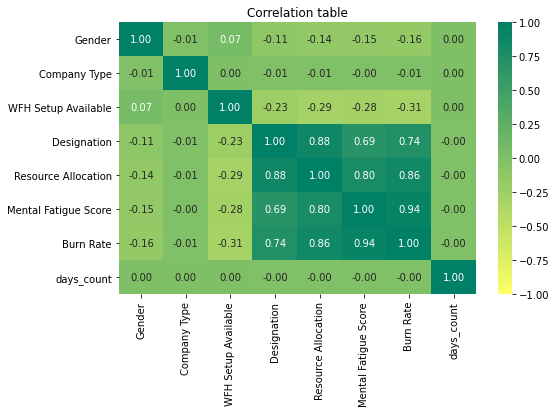

In [75]:
# correlation table
train_corr = df_train.corr()
plt.figure(figsize=(8,5))
sns.heatmap(data=train_corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="summer_r")
plt.yticks(rotation=0)
plt.title('Correlation table')
plt.show()

In [76]:
# burn rate grouped by home office setup
burn_rate_WFH_Setup = df_train.groupby(['WFH Setup Available'])['Burn Rate'].mean()
print(burn_rate_WFH_Setup)

WFH Setup Available
0    0.518227
1    0.396303
Name: Burn Rate, dtype: float64


In [77]:
# burn rate grouped by resource allocation
burn_rate_resource = df_train.groupby(['Resource Allocation'])['Burn Rate'].mean()
print(burn_rate_resource)

Resource Allocation
1.0     0.138569
2.0     0.254153
3.0     0.339812
4.0     0.418793
5.0     0.492756
6.0     0.576471
7.0     0.655309
8.0     0.736119
9.0     0.829722
10.0    0.900373
Name: Burn Rate, dtype: float64


In [78]:
# burn rate grouped by company type
burn_rate_company = df_train.groupby(['Company Type'])['Burn Rate'].mean()
print(burn_rate_company)

Company Type
0    0.453292
1    0.450835
Name: Burn Rate, dtype: float64


In [79]:
# burn rate grouped by gender
burn_rate_gender = df_train.groupby(['Gender'])['Burn Rate'].mean()
print(burn_rate_gender)

Gender
0    0.484967
1    0.422938
Name: Burn Rate, dtype: float64


In [80]:
# employees grouped by resource allocation and home office setup
resource_allocation_gender = df_train.groupby(['WFH Setup Available', 'Resource Allocation'])['Resource Allocation'].count()
print(resource_allocation_gender)

WFH Setup Available  Resource Allocation
0                    1.0                     484
                     2.0                     515
                     3.0                     843
                     4.0                    1238
                     5.0                    1691
                     6.0                    1631
                     7.0                    1148
                     8.0                     646
                     9.0                     268
                     10.0                     96
1                    1.0                    1067
                     2.0                    1279
                     3.0                    1918
                     4.0                    2158
                     5.0                    1673
                     6.0                     959
                     7.0                     549
                     8.0                     261
                     9.0                     128
                     10.0   

Text(0.5, 1.0, 'Resource Allocation by Setup')

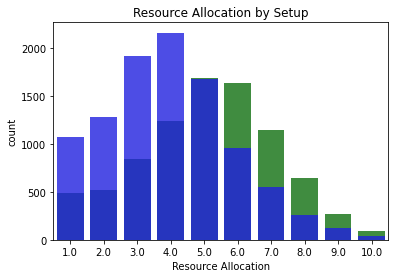

In [103]:
grouped_no = df_train[df_train['WFH Setup Available'] == 0]
grouped_no.groupby(['Resource Allocation'])['Resource Allocation'].count()
sns.countplot(grouped_no['Resource Allocation'], color='green', alpha=0.8)

grouped_yes = df_train[df_train['WFH Setup Available'] == 1]
grouped_yes.groupby(['Resource Allocation'])['Resource Allocation'].count()
sns.countplot(grouped_yes['Resource Allocation'], color='blue', alpha=0.8)

plt.title('Resource Allocation by Setup')

In [107]:
grouped_no.mean()

Gender                     0.484463
Company Type               0.344743
WFH Setup Available        0.000000
Designation                2.463785
Resource Allocation        5.118224
Mental Fatigue Score       6.309439
Burn Rate                  0.518227
days_count              4570.253621
dtype: float64

In [108]:
grouped_yes.mean()

Gender                     0.558325
Company Type               0.345464
WFH Setup Available        1.000000
Designation                1.936690
Resource Allocation        3.947458
Mental Fatigue Score       5.239511
Burn Rate                  0.396303
days_count              4570.730808
dtype: float64

Text(0.5, 1.0, 'Designation by Setup')

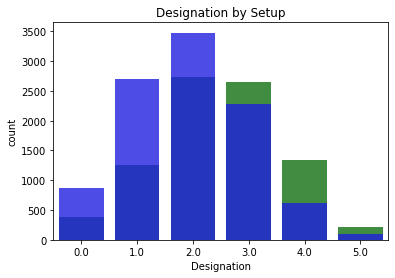

In [109]:
grouped_designation_no = df_train[df_train['WFH Setup Available'] == 0]
grouped_designation_no.groupby(['Designation'])['Designation'].count()
sns.countplot(grouped_designation_no['Designation'], color='green', alpha=0.8)

grouped_designation_yes = df_train[df_train['WFH Setup Available'] == 1]
grouped_designation_yes.groupby(['Designation'])['Designation'].count()
sns.countplot(grouped_designation_yes['Designation'], color='blue', alpha=0.8)


plt.title('Designation by Setup')

Text(0.5, 1.0, 'Gender Burnout by Setup')

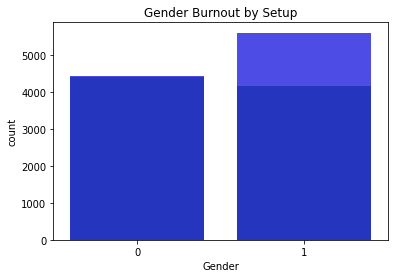

In [110]:
grouped_gender_no = df_train[df_train['WFH Setup Available'] == 0]
grouped_gender_no.groupby(['Gender'])['Burn Rate'].mean()
sns.countplot(grouped_gender_no['Gender'], color='green', alpha=0.8)

grouped_gender_yes = df_train[df_train['WFH Setup Available'] == 1]
grouped_gender_yes.groupby(['Gender'])['Burn Rate'].mean()
sns.countplot(grouped_gender_yes['Gender'], color='blue', alpha=0.8)


plt.title('Gender Burnout by Setup')

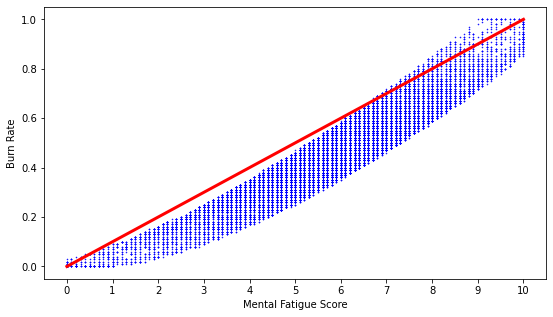

In [23]:
# highest correlation with Mental Fatigue Score
plt.figure(figsize=(9,5))
plt.scatter("Mental Fatigue Score", "Burn Rate", data=df_train, s=0.3, c="blue")
plt.plot([0,10], [0,1], linewidth=3, c="red")
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Burn Rate")
plt.xticks(range(0,11))
plt.show()

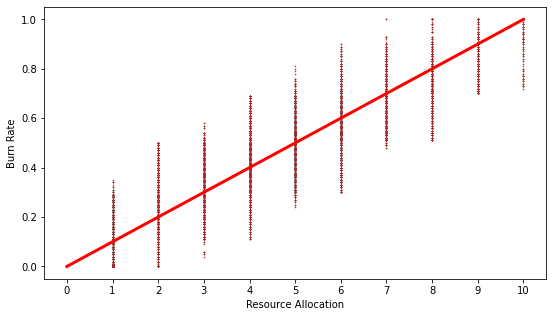

In [84]:
# correlation with "Resource Allocation"
plt.figure(figsize=(9,5))
plt.scatter("Resource Allocation", "Burn Rate", data=df_train, s=0.3, c="brown")
plt.plot([0,10], [0,1], linewidth=3, c="red")
plt.xlabel("Resource Allocation")
plt.ylabel("Burn Rate")
plt.xticks(range(0,11))
plt.show()

In [85]:
df_test.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       1             1                    1          1.0   
2       0             1                    1          1.0   
3       1             0                    0          3.0   
4       1             1                    0          2.0   

   Resource Allocation  Mental Fatigue Score  days_count  
0                  5.0                   7.7        4409  
1                  2.0                   5.2        4527  
2                  3.0                   5.9        4436  
3                  6.0                   4.6        4716  
4                  5.0                   6.4        4555

In [86]:
# saving the cleaned data, we will need it later for scenario analysis
clean_df_train = df_train.copy()
clean_df_train.to_csv("clean_df_train.csv", index=False)
train_file_path = r"C:\Users\BernadettKepenyes\Documents\GitHub\employee-burnout\clean_df_train.csv"
new_df_train = pd.read_csv(train_file_path)

new_df_train.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       0             0                    1          1.0   
2       0             0                    1          1.0   
3       1             0                    0          3.0   
4       0             1                    1          2.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  days_count  
0                  3.0                   3.8       0.16        4480  
1                  2.0                   5.0       0.36        4419  
2                  1.0                   2.6       0.20        4446  
3                  7.0                   6.9       0.52        4548  
4                  4.0                   3.6       0.29        4423

In [87]:
# Linear Regression
X = df_train[['Gender','Company Type','WFH Setup Available','Designation','Resource Allocation','Mental Fatigue Score','days_count']]
y = df_train['Burn Rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)

y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test)
r2_train = r2_score(y_train, y_train_preds)
r2_test = r2_score(y_test, y_test_preds)

print(r2_train, '\n', r2_test)
print(lm_model.intercept_)
print(lm_model.coef_)
print(y_train_preds)

0.9207684047874273 
 0.9202038154359504
-0.0951644483393359
[-4.71055872e-03 -3.30296603e-04 -1.11114967e-02 -4.56368678e-03
  2.84583850e-02  7.40899831e-02  3.00987676e-06]
[0.72100447 0.63021342 0.43407264 ... 0.33394635 0.36158428 0.70767981]


In [88]:
# Random Forest

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_train_preds_rf = rf_model.predict(X_train)
y_test_preds_rf = rf_model.predict(X_test)

r2_train_rf = r2_score(y_train, y_train_preds_rf)
r2_test_rf = r2_score(y_test, y_test_preds_rf)
print(r2_train_rf, '\n', r2_test_rf)

0.9883130957975104 
 0.9153174956208157


In [89]:
# checking the prediction accuracy
y_train_preds_df = pd.DataFrame(data=y_train_preds, columns=['Prediction'], index=X_train.index.copy())

df_out = pd.merge(df_train, y_train_preds_df, how='left', left_index = True, right_index=True)
df_out.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       0             0                    1          1.0   
3       0             0                    1          1.0   
4       1             0                    0          3.0   
5       0             1                    1          2.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  days_count  \
0                  3.0                   3.8       0.16        4480   
1                  2.0                   5.0       0.36        4419   
3                  1.0                   2.6       0.20        4446   
4                  7.0                   6.9       0.52        4548   
5                  4.0                   3.6       0.29        4423   

   Prediction  
0         NaN  
1    0.329828  
3    0.123635  
4         NaN  
5    0.278137

In [90]:
# drop NaN
df_out.dropna(subset=["Prediction"], axis=0, inplace = True)
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 1 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                14872 non-null  int64  
 1   Company Type          14872 non-null  int64  
 2   WFH Setup Available   14872 non-null  int64  
 3   Designation           14872 non-null  float64
 4   Resource Allocation   14872 non-null  float64
 5   Mental Fatigue Score  14872 non-null  float64
 6   Burn Rate             14872 non-null  float64
 7   days_count            14872 non-null  int64  
 8   Prediction            14872 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.1 MB


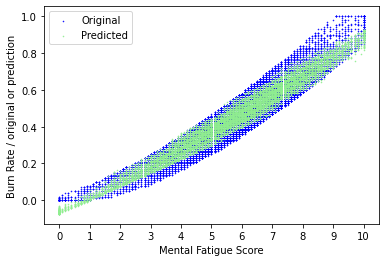

In [91]:
# original vs predicted comparison
v = df_out['Burn Rate']
z = df_out['Prediction'] 
w = df_out['Mental Fatigue Score']

plt.scatter(w, v, color="blue", label="Original", s=0.3)
plt.scatter(w, z, color="lightgreen", label="Predicted", s=0.3)
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Burn Rate / original or prediction")
plt.xticks(range(0,11))
plt.legend()
plt.show()

In [111]:
# Error statistics
print('MAE: ', metrics.mean_absolute_error(v, z))
print('MSE: ', metrics.mean_squared_error(v, z))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(v,z)))

MAE:  0.04564441988103926
MSE:  0.003115770663610376
RMSE:  0.05581908870279392
